# IMPORTING REQUIRED LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# GETTING THE DATASET

In [3]:
file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df=pd.read_csv(file_path, header=None)
df.head()

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


# ADDING HEADERS TO THE DATASET

In [4]:
headers = ['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region', 'charges']

In [5]:
df.columns = headers
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


# REPLACING " ? " entries with " NaN "

In [6]:
df.replace('?', np.nan, inplace=True)

# DATA WRANGLING

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


In [8]:
df.duplicated().sum()

1424

In [9]:
df.isnull().sum()

age               4
gender            0
bmi               0
no_of_children    0
smoker            7
region            0
charges           0
dtype: int64

### handling mising values

In [10]:
is_smoker = df['smoker'].value_counts().idxmax()
df['smoker'].replace(np.nan, is_smoker, inplace=True)

mean_age = df['age'].astype('float').mean(axis=0)
df['age'].replace(np.nan, mean_age, inplace=True)

### updating datatypes

In [11]:
df[['age', 'smoker']] = df[['age', 'smoker']].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int32  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int32  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.1 KB


# SETTING COLUMN "charges" to 2 DECIMAL PLACES

In [12]:
df[['charges']] = np.round(df[['charges']], 2)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86


# EDA

### regression plot for 'charges' and 'bmi'

(0.0, 66902.85800000001)

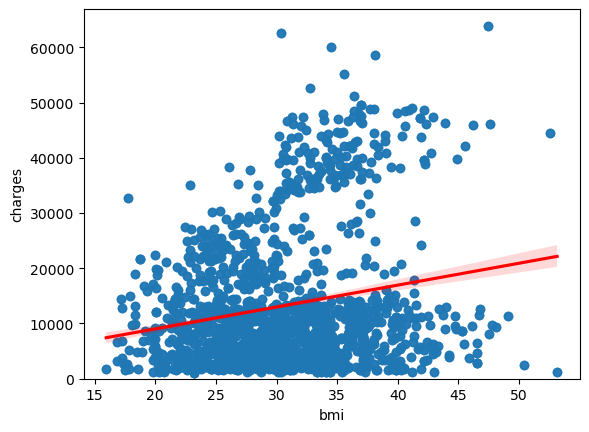

In [36]:
sns.regplot(x='bmi', y='charges', data=df, line_kws={'color':'red'})
plt.ylim(0,)

### boxplot for 'charges' and 'smoker'

<Axes: xlabel='smoker', ylabel='charges'>

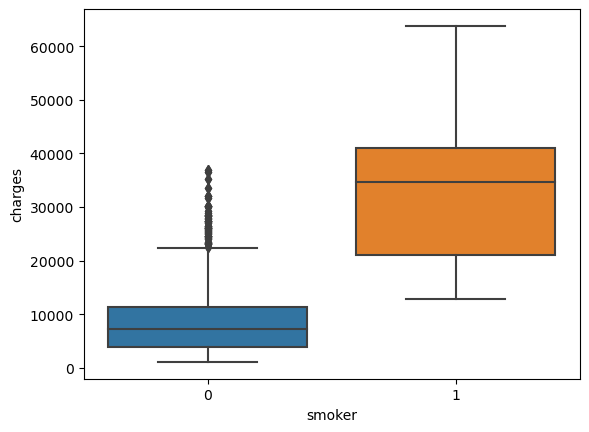

In [14]:
sns.boxplot(x='smoker', y='charges', data=df)

### getting correlation for the data

In [15]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


# MODEL DEVELOPMENT

### fitting the regression model to predict 'charges' just by using 'smoker'

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
x = df[['smoker']]
y = df['charges']
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

### getting r^2 score

In [18]:
lm.score(x, y)

0.6221791733924185

### fitting the regression model to predict 'charges' by using all other attributes

In [19]:
z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(z,y)

LinearRegression()

### getting r^2 score

In [20]:
lm.score(z,y)

0.7504083820289634

### using other method for further improvisation

In [21]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [22]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
z = z.astype(float)
pipe.fit(z,y)
ypipe=pipe.predict(z)
print(r2_score(y, ypipe))

0.8452456286532801


# MODEL REFINEMENT

### splitting the data into training and testing 

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score

In [24]:
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.2, random_state=1)

### creating the ridgemodel with alpha value of 0.1

In [25]:
from sklearn.linear_model import Ridge

In [26]:
ridgemodel = Ridge(alpha=0.1)
ridgemodel.fit(x_train, y_train)

Ridge(alpha=0.1)

### getting the prediction

In [27]:
yhat = ridgemodel.predict(x_test)
yhat[0:5]

array([33623.95784253,  2052.67061318,  8577.40601388,  3371.11146694,
       29757.58705731])

### getting the r^2 score

In [29]:
r2_score(y_test, yhat)

0.6760807731582404

### applying degree 2 polynomial transformation

In [30]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
ridgemodel.fit(x_train_pr, y_train)

Ridge(alpha=0.1)

### getting the predictions and r^2 score

In [31]:
y_hat = ridgemodel.predict(x_test_pr)
y_hat[0:5]

array([41583.21157462,  4717.15399889,  7846.49061233,  2182.15373478,
       21336.03204419])

In [32]:
r2_score(y_test, y_hat)

0.7835631107608153